In [16]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier


In [6]:

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)



In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

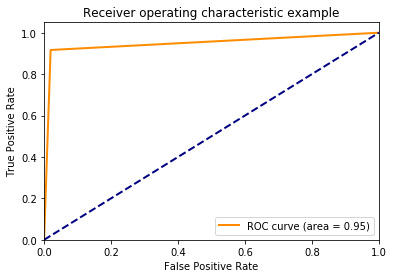

In [5]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder


In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
OneHotEncoder(handle_unknown='ignore')
enc.categories_
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [12]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [ ]:
enc.categories_
[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
>>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])
>>> enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
array([['Male', 1],
       [None, 2]], dtype=object)
>>> enc.get_feature_names(['gender', 'group'])
array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
  dtype=object)
>>> drop_enc = OneHotEncoder(drop='first').fit(X)
>>> drop_enc.categories_
[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
>>> drop_enc.transform([['Female', 1], ['Male', 2]]).toarray()
array([[0., 0., 0.],
       [1., 1., 0.]])

In [17]:
df=pd.DataFrame({'A':['a','b','a'],'B':['b','a','c']})

In [18]:
df

,A,B
0,a,b
1,b,a
2,a,c


In [26]:
enc = OneHotEncoder()
d=enc.fit(df)   


In [27]:
enc.transform([[0, 1, 1]]).toarray()

D:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
D:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


ValueError: Found unknown categories [0] in column 0 during transform